# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2  AC 209 : Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Chris Tanner

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Restart the kernel and run the whole notebook again before you submit. 
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed.

<hr style="height:2pt">

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<hr style="height:2pt">
<hr style="height:2pt">

<div class='theme'> <b>Linear Algebra, Accuracy, and Confidence Intervals</b> </div>

In this part of the homework, you will see how *uncertainty* in the $\beta$ coefficients can directly impact our ability to make predictions with a linear regression model and how in general we can do inference on the predictors. 

The data for this supplement are imported for you in the cells below.

First a little review. The linear model assumes:
$$ y_i \sim N(\beta_0+\beta_1 x_i,\sigma^2 )   $$

This means, pun intended, that $ \mu_{y_i} = \beta_0+\beta_1 x_i $, which can be estimated with $ \hat{\mu}_{y_i} = \hat{\beta}_0+\hat{\beta}_1 x_i $.

And for a new observation not in the data set, once we measure the new predictor value, $x^*$, we can predict its response, $y^*$, from our model as:
$$\hat{y}^* = \hat{\mu}_{y_i} + \hat{\varepsilon}^* $$

Which can be calculated by using the estimate for $\hat{\mu}_{y_i}$ and adding on a randomly selected value for $\hat{\varepsilon}^*$ from its assumed (and estimated) distribution, $N(0,\hat{\sigma}^2)$.


In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("data/cleaned_mtcars.csv")
df.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
y = df[['mpg']].values
X = df[['cyl','disp','hp','wt','qsec']]


X = sm.add_constant(X)

/home/chris/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


---- 


<div class='exercise'> <b> Question 1 [20 pts] </b> </div>

**1.1** Fit a simple linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our true mean predictions at various values of `disp` and make a well-labeled plot showing
 1. The observed values of `disp` and `mpg`.
 2. The estimated regression line.
 3. The upper and lower bounds of the 95% confidence interval for the true average (not the observed) `mpg` at any given displacement.
 
**1.2** Why do we have a confidence interval for our true mean prediction values?  Why isn't the mean prediction just a single number?

**1.3** Someone asks what mean `mpg` you would predict for a `disp` value of 400. What do you tell them?  Paying attention to the confidence interval (1.1.3) above?
[PP: shouldn't be 1.1.2?]

**1.4** Why does the 95% confidence interval for the mean predicted `mpg` appear to curve as we move away from the data's center? 

**1.5** An alternative way to produce the confidence intervals from 1.1 is through the bootstrap though takes some care.  Create 2,000 bootstrap samples in order to create 2,000 bootstrapped regression models and store their estimated intercept and slope values.  Use these bootstrapped estimates to build the 95\% confidence intervals as in 1.1, and recreate the plot from that question with your new bootstrapped confidence intervals.  Compare this new plot to the one from 1.1.
[PP: JESUS LORD ... bootstrap 2000 out of 33 observations???] 

**1.6** Another interval of uncertainty in a regression model is called a *prediction interval*.  A prediction interval gives a range of plausible values for a future individual observation, $\hat{y}^*$, given a specific value of $x$ in general (`disp` here).  How should the 95\% prediction interval calculated at a `disp` value of 400 compare to the corresponding 95\% confidence interval for the mean predicted `mpg`?  Justify with a few sentences.

### Answers

**1.1 Fit a simple linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our true mean predictions at various values of `disp` and make a well-labeled plot showing**
 1. The observed values of `disp` and `mpg`.
 2. The estimated regression line.
 3. The upper and lower bounds of the 95% confidence interval for the true average (not the observed) `mpg` at any given displacement.

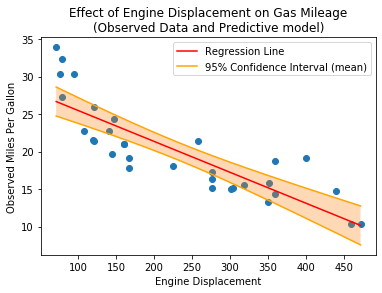

In [6]:
# your code here 
x_var = 'disp'

# fit a simple linear regression predicting mpg via weight
simple_model = sm.OLS(y, X[['const',x_var]]).fit()
simple_model.summary()


x_vals = np.linspace(X[x_var].min(),X[x_var].max(),500)
line_y_vals = simple_model.predict(sm.add_constant(x_vals))

prediction_int = simple_model.get_prediction(sm.add_constant(x_vals)).summary_frame()

plt.scatter(X[x_var],y)
plt.plot(x_vals,line_y_vals,c='r', label="Regression Line")
plt.plot(x_vals,prediction_int['mean_ci_upper'],c='orange',label="95% Confidence Interval (mean)")
plt.plot(x_vals,prediction_int['mean_ci_lower'],c='orange',label="")
plt.fill_between(x_vals, prediction_int['mean_ci_lower'], prediction_int['mean_ci_upper'], alpha=.3)
plt.xlabel("Engine Displacement")
plt.ylabel("Observed Miles Per Gallon")
plt.title("Effect of Engine Displacement on Gas Mileage\n(Observed Data and Predictive model)")
plt.legend();
plt.show()

**1.2 Why do we have a confidence interval for our true mean prediction values?  Why isn't the mean prediction just a single number?**


*your answer here*

The regression line predicts mean `mpg` at each value of `disp` (for instance we think the average `mpg` of all cars with `disp`=250 will be 20 miles per gallon). However, we don't perfectly know what the average `mpg` is at each `disp` value, and if we re-collected the data and re-ran our model our prediction might be higher or lower. The bounds above give a reasonable estimate of where the true average `mpg` might be.

**1.3 Someone asks what mean `mpg` you would predict for a `disp` value of 400. What do you tell them?  Paying attention to the confidence interval (1.1.3) above?**

In [7]:
# your code here

print("Confidence interval data for disp=400:")
simple_model.get_prediction([1,400]).summary_frame()

Confidence interval data for disp=400:


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,13.113807,0.983136,11.105976,15.121638,6.176537,20.051077


*your answer here*

We should tell them:
1. My best single estimate is that the car will get 13.11 miles per gallon.
2. However, I'm not completely certain in that value. Based on the data, the optimal prediciton could reasonably be anywhere between 11.1 and 15.12.
3. The range of _actual_ `mpg` ratings we see could reasonably be as low as 6.17 or as high as 20.05. The range quoted above is only describing what I think the _average_ `mpg` of cars with a `disp` of 400 might be.

**1.4 Why does the 95% confidence interval for the mean predicted `mpg` appear to curve as we move away from the data's center?**

*your answer here*

All regression lines (with an intercept) must pass through the average value of the data-- if the predictor is at its mean, guess the mean of the response. However, suppose we move 10 units away from the mean, and our uncertainty in the slope is +/-.2 mpg/disp. The lower bound at 10 units would be -2 units and the upper bound would be +2 units. If we moved 20 units instead, the same error in the slope gives bounds at +/- 4 units. The farther out we move, the wider our bounds have to be.

**1.5 An alternative way to produce the confidence intervals from 1.1 is through the bootstrap though takes some care.  Create 2,000 bootstrap samples in order to create 2,000 bootstrapped regression models and store their estimated intercept and slope values.  Use these bootstrapped estimates to build the 95\% confidence intervals as in 1.1, and recreate the plot from that question with your new bootstrapped confidence intervals.  Compare this new plot to the one from 1.1.**

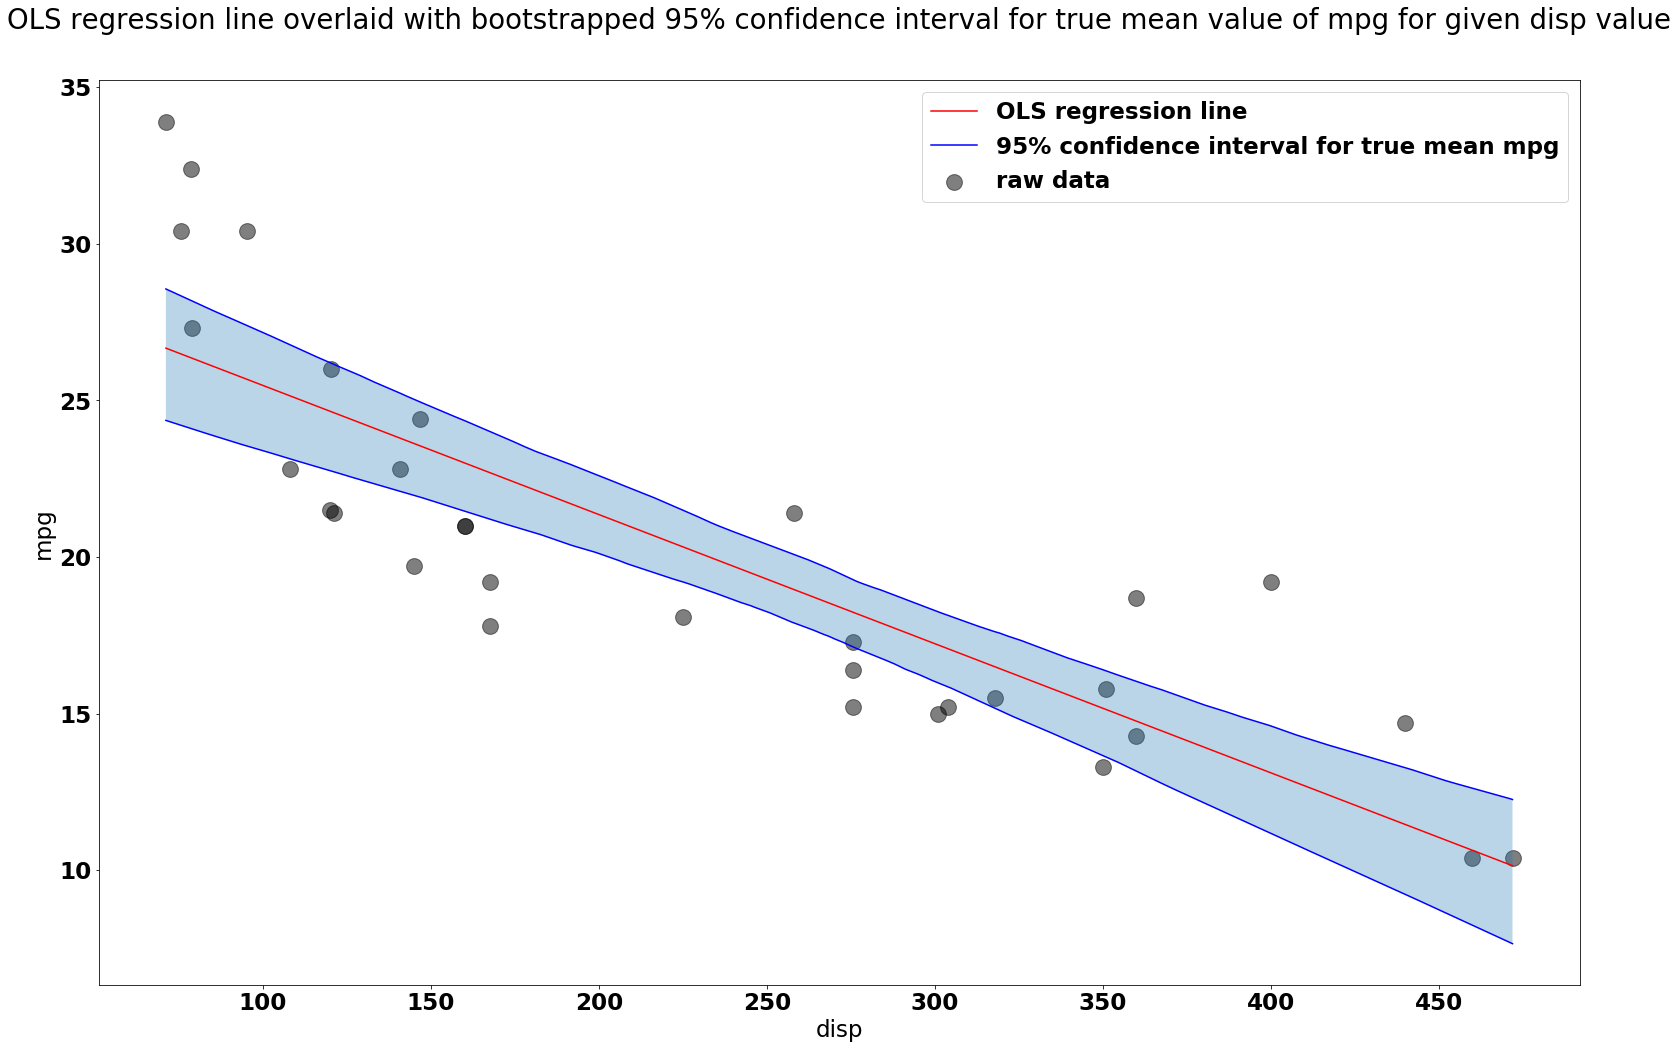

In [24]:
# your code here
samples = 500
alpha = 0.05
num_data_points = len(y)
intercepts = np.zeros(samples)
slopes = np.zeros(samples)
for i in range(samples):
    df_bootstrapped = df.sample(n=num_data_points, replace=True)
    y_boostrapped = df_bootstrapped[['mpg']].values
    x_bootstrapped = sm.add_constant(df_bootstrapped[['disp']].values)
    FittedOLS = sm.OLS(y_boostrapped, x_bootstrapped).fit()
    intercepts[i] = FittedOLS.params[0]
    slopes[i] = FittedOLS.params[1]
    
lower_bound_bootsrap = []
upper_bound_bootsrap = []


for x_val in x_vals:
    means = intercepts + slopes * x_val
    lower_bound_bootsrap.append(np.quantile(means, alpha / 2))
    upper_bound_bootsrap.append(np.quantile(means, 1 - (alpha / 2)))

# Let's make our plot a bit easier to read
font = {'weight' : 'bold', 'size'   : 23}
matplotlib.rc('font', **font)

plt.figure(figsize=(25, 15))
plt.scatter(X[x_var], y, color='k', marker='.', s=10**3, alpha=.5, label='raw data')
plt.plot(x_vals, line_y_vals, '-r', label='OLS regression line')
plt.plot(x_vals, lower_bound_bootsrap, '-b', label='95% confidence interval for true mean mpg')
plt.plot(x_vals, upper_bound_bootsrap, '-b')
plt.fill_between(disp_vals, lower_bound_bootsrap,upper_bound_bootsrap, alpha=0.3)
plt.legend(loc='upper right')
plt.xlabel('disp', )
plt.ylabel('mpg')
plt.title('OLS regression line overlaid with bootstrapped 95% confidence interval for true mean value of mpg for given disp value', y=1.05)
plt.tight_layout()
plt.show()

*your answer here*

The intervals based on the two approaches should be reasonably similar in width and both get wider as you estimate $\mu_y$ at an $x$ further from $\bar{x}$, but the ones calculated via the bootstrap will not be a smooth since there will be random noise in the estimated bounds.

**1.6 Another interval of uncertainty in a regression model is called a *prediction interval*.  A prediction interval gives a range of plausible values for a future individual observation, $\hat{y}^*$, given a specific value of $x$ in general (`disp` here).  How should the 95\% prediction interval calculated at a `disp` value of 400 compare to the corresponding 95\% confidence interval for the mean predicted `mpg`?  Justify with a few sentences.**

*your answer here*

THe 95\% prediction interval (PI) will be centered at the same place as the 95\% confidence interval (centered at the regression line), but will generally be much wider.  Note: these PIs should contain roughly 95\% of current and future data points.  Mathematical justification:

$$E(\hat{y}^*) = E(\hat{\mu}_{y}^* + \varepsilon) = E(\hat{\mu}_{y}^*)+0$$

$$Var(\hat{y}^*) = Var(\hat{\mu}_{y^*} + \varepsilon) = Var(\hat{\mu}_{y}^*) + Var(\varepsilon) = Var(\hat{\mu}_{y^*}) + \sigma^2$$